# Unit 5 - Financial Planning

In [326]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [327]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [328]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [329]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [330]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()

# Compute current value of my crpto
my_btc_value = my_btc * btc_response_data['data']['1']['quotes']['USD']['price']
my_eth_value = my_eth * eth_response_data['data']['1027']['quotes']['USD']['price']
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $48768.00
The current value of your 5.3 ETH is $16163.52


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [331]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [332]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [333]:
# Format current date as ISO format
current_date = ( pd.Timestamp("2022-04-08", tz="America/New_York") ).isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
ticker_data = api.get_bars(
    tickers,
    timeframe,
    start=current_date,
    end=current_date
).df


# Reorganize the DataFrame
# Separate ticker data
AGG = ticker_data[ticker_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = ticker_data[ticker_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
ticker_data = pd.concat([SPY,AGG],axis=1, keys=['SPY', 'AGG'])
ticker_data.index = ticker_data.index.date
# Preview DataFrame
ticker_data

SPY                                                            \
              open    high     low   close    volume trade_count        vwap   
2022-04-08  448.04  450.63  445.94  447.57  79148376      573491  448.250805   

               AGG                                                            
              open    high      low   close   volume trade_count        vwap  
2022-04-08  104.82  105.01  104.615  104.73  6501822       24900  104.804999

In [334]:
# Pick AGG and SPY close prices
agg_close_price = ticker_data['AGG']['close'][pd.to_datetime(current_date).date()]
spy_close_price = ticker_data['SPY']['close'][pd.to_datetime(current_date).date()]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $104.73
Current SPY closing price: $447.57


In [335]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22378.50
The current value of your 200 AGG shares is $20946.00


### Savings Health Analysis

In [336]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_crypto = my_btc_value + my_eth_value
my_shares = my_agg_value + my_spy_value
# Create savings DataFrame
savings = {'amount': [my_crypto, my_shares]}
df_savings = pd.DataFrame(savings, index= ['crypto','shares'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,64931.516
shares,43324.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

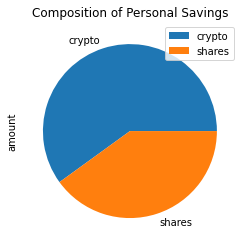

In [337]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [338]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()
print(f"Emergency Funds: ${emergency_fund:0.2f} \nTotal Savings: ${total_savings:0.2f}")
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations for having enough money in this fund")
elif total_savings == emergency_fund:
    print("Congratulations on reaching this financial goal")
else:
    print(f"You are ${emergency_fund - total_savings:0.2f} away from reaching this financial goal")

Emergency Funds: $36000.00 
Total Savings: $108256.02
Congratulations for having enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [339]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = (pd.Timestamp('2022-04-08', tz='America/New_York')-pd.DateOffset(years=5)).isoformat()
end_date = pd.Timestamp('2022-04-08', tz='America/New_York').isoformat()

In [340]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG', 'SPY'])
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                                             \
              open    high       low   close   volume trade_count        vwap   
2017-04-10  108.53  108.65  108.4901  108.58  1903768       12236  108.566615   
2017-04-11  108.79  108.98  108.7500  108.89  2200830       11420  108.874603   
2017-04-12  108.93  109.20  108.8900  109.13  2432965       10372  109.013960   
2017-04-13  109.25  109.39  109.1300  109.27  2339939       13465  109.262713   
2017-04-17  109.30  109.40  109.1800  109.21  1646056        7973  109.294030   

               SPY                                                             
              open     high     low   close    volume trade_count        vwap  
2017-04-10  235.36  236.255  234.73  235.34  67615302      211985  235.487358  
2017-04-11  234.90  235.180  233.34  235.06  88045276      306525  234.499802  
2017-04-12  234.80  234.960  233.77  234.03  81864436      262862  234.298297  
2017-04-13  233.65  234.490  232.51  232.51  92880394      303955  233.364725  
2017-04-17  233.12  234.570  232.88  234.57  68405367      213643  233.870859

In [341]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500
num_trading_days = 252 * 30
MC_30 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = num_trading_days
)

In [342]:
# Printing the simulation input data
MC_30.portfolio_data.tail()

AGG                                                  \
              open     high      low   close    volume trade_count   
2022-04-04  106.87  106.870  106.560  106.84   9956493       32544   
2022-04-05  106.60  106.625  105.740  105.76  11018430       34684   
2022-04-06  105.20  105.805  105.115  105.49  13322630       47090   
2022-04-07  105.38  105.510  105.130  105.26   7921117       25631   
2022-04-08  104.82  105.010  104.615  104.73   6501822       24900   

                                        SPY                          \
                  vwap daily_return    open    high     low   close   
2022-04-04  106.739298     0.000843  453.20  456.91  452.26  456.80   
2022-04-05  105.931526    -0.010109  455.23  457.83  449.82  451.03   
2022-04-06  105.463015    -0.002553  446.87  448.93  443.47  446.52   
2022-04-07  105.278761    -0.002180  445.67  450.69  443.53  448.77   
2022-04-08  104.804999    -0.005035  448.04  450.63  445.94  447.57   

                                                            
               volume trade_count        vwap daily_return  
2022-04-04   59663209      503316  455.309774     0.008567  
2022-04-05   74022189      644313  453.412462    -0.012631  
2022-04-06  105592595      901634  446.345270    -0.009999  
2022-04-07   77538519      628673  447.098209     0.005039  
2022-04-08   79148376      573491  448.250805    -0.002674

In [343]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/akanksha/Rutgers/Rutgers-FinTech/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000183,0.999487,1.001897,0.979426,1.008948,0.994699,0.998990,1.011918,1.004582,0.982694,...,0.992700,0.990317,1.004708,0.997450,1.006059,1.004771,0.988543,1.001474,1.000020,1.003871
2,1.001950,1.004763,1.002861,0.982736,0.992272,1.000458,0.986080,0.998887,1.008656,0.968456,...,0.992113,0.990783,1.010177,1.008935,0.999015,0.997558,0.978377,0.993385,1.009178,1.009107
3,1.002526,1.002004,1.011926,0.974469,1.003279,1.002919,0.983000,1.004133,1.022333,0.972605,...,0.996987,0.990747,1.012599,1.015116,0.995057,0.989443,0.985702,0.970710,1.014465,1.021830
4,1.010088,1.000338,1.004359,0.982084,0.998549,1.002362,0.970679,1.007956,1.020756,0.979681,...,0.989100,0.975828,1.025629,1.013903,1.003410,0.995380,0.969818,0.966243,1.022110,1.014218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.388522,2.693710,30.831322,16.292696,3.718781,8.295376,10.567271,40.547894,13.544214,5.583511,...,3.169299,22.960237,9.379118,16.466153,13.847162,9.959504,39.288784,8.474942,4.508633,2.189536
7557,13.425719,2.731423,31.067265,16.465477,3.745103,8.280320,10.613492,40.453878,13.335183,5.566073,...,3.189461,22.905292,9.486988,16.372016,13.876167,10.035464,39.639707,8.433296,4.512099,2.181003
7558,13.508452,2.724177,31.243247,16.542664,3.749602,8.336746,10.577919,41.083789,13.351714,5.589005,...,3.208457,22.906933,9.609922,16.306498,13.991633,9.891414,39.507688,8.425329,4.565104,2.160441
7559,13.597130,2.749324,31.459946,16.463435,3.751562,8.278666,10.620313,41.445282,13.370352,5.571105,...,3.252762,23.005942,9.611510,16.304335,14.088477,9.837228,39.371586,8.400390,4.603976,2.166414


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

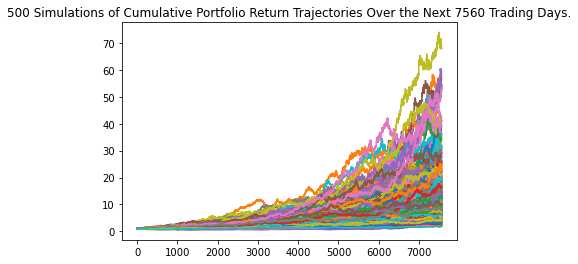

In [344]:
# Plot simulation outcomes
MC_30.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

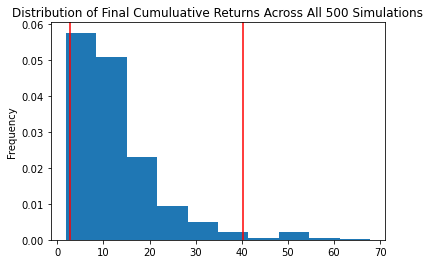

In [345]:
# Plot probability distribution and confidence intervals
MC_30.plot_distribution()

### Retirement Analysis

In [346]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_30 = MC_30.summarize_cumulative_return()

# Print summary statistics
summary_30

count           500.000000
mean             12.946844
std               9.735097
min               1.851888
25%               6.613584
50%              10.239011
75%              16.426290
max              67.831882
95% CI Lower      2.661158
95% CI Upper     40.329406
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [347]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_30['95% CI Lower']*initial_investment,2)
ci_upper = round(summary_30['95% CI Upper']*initial_investment,2)

# Print results
print_thirty = f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio over the next 30 years will end within in the range of ${ci_lower} and ${ci_upper}"
print(print_thirty)

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $53223.16 and $806588.13


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [348]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_30['95% CI Lower']*initial_investment,2)
ci_upper = round(summary_30['95% CI Upper']*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $79834.75 and $1209882.19


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [349]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500
num_trading_days = 252 * 5
MC_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.70,.30],
    num_simulation = num_sims,
    num_trading_days = num_trading_days
)

In [350]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/akanksha/Rutgers/Rutgers-FinTech/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997160,1.004181,0.991519,0.998870,1.004948,1.005328,1.000601,1.000921,1.004208,0.994730,...,1.004819,0.998436,0.999122,0.994971,0.997065,0.997370,1.003277,1.006712,0.996399,1.002676
2,1.001859,1.001838,0.988221,1.003519,1.002550,1.005984,1.007065,1.005347,0.995859,0.997439,...,1.007802,0.998128,1.003580,0.998592,1.000257,1.001605,0.997321,1.005438,0.998469,1.000812
3,0.996636,0.996722,0.989094,1.010727,1.012584,1.008367,1.008998,1.000484,0.995323,1.000992,...,1.005566,1.004726,1.003303,0.999695,1.004907,1.007217,0.996019,1.003806,1.000086,1.005448
4,0.983492,0.989344,0.992743,1.010091,1.011462,1.015429,0.998994,0.996056,0.998744,0.996545,...,1.003993,1.010169,1.010542,0.997030,1.002688,1.009034,0.998745,1.005651,1.008310,1.009232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.529044,1.149478,1.223175,1.121943,1.255333,1.292063,1.336976,1.445257,1.272883,1.320598,...,1.150408,1.402612,1.048997,1.476941,1.573761,1.220708,1.255388,1.138875,1.007484,1.294873
1257,1.536535,1.146396,1.232386,1.121384,1.258122,1.292723,1.336120,1.456601,1.281062,1.323683,...,1.154507,1.404958,1.049651,1.479962,1.570377,1.219420,1.262069,1.139480,0.997531,1.286279
1258,1.539168,1.140936,1.225281,1.116169,1.258723,1.290664,1.345910,1.447812,1.277677,1.330061,...,1.156811,1.409030,1.054395,1.472365,1.570829,1.224359,1.263937,1.140686,0.988726,1.285428
1259,1.542456,1.134150,1.233897,1.119110,1.265068,1.293119,1.339821,1.444182,1.282291,1.324479,...,1.162223,1.414053,1.055846,1.469982,1.575425,1.223364,1.267446,1.144257,0.988105,1.285635


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

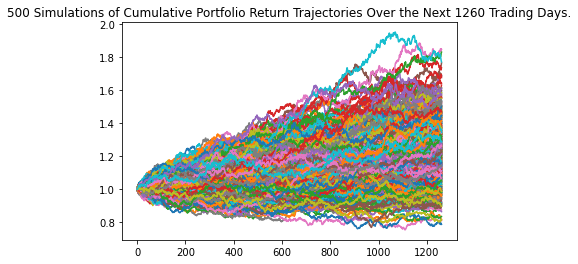

In [351]:
# Plot simulation outcomes
MC_5.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

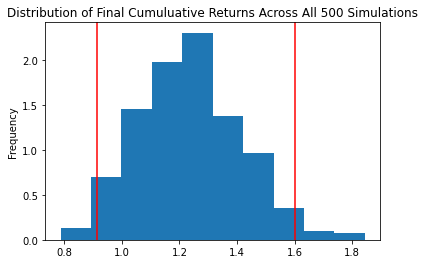

In [352]:
# Plot probability distribution and confidence intervals
MC_5.plot_distribution()

In [353]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_5 = MC_5.summarize_cumulative_return()

# Print summary statistics
summary_5

count           500.000000
mean              1.235294
std               0.178951
min               0.786728
25%               1.106726
50%               1.231856
75%               1.342486
max               1.844499
95% CI Lower      0.912774
95% CI Upper      1.601887
Name: 1260, dtype: float64

In [354]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_5['95% CI Lower'] * initial_investment,2)
ci_upper_five = round(summary_5['95% CI Upper'] * initial_investment,2)

# Print results
print_five = f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio over the next 5 years will end within in the range of ${ci_lower_five} and ${ci_upper_five}"
print(print_five)

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $45638.72 and $80094.35


### Ten Years Retirement Option

In [355]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500
num_trading_days = 252 * 10
MC_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.10,.90],
    num_simulation = num_sims,
    num_trading_days = num_trading_days
)

In [356]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/akanksha/Rutgers/Rutgers-FinTech/02-Homework/05-APIs/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993206,1.010810,1.011102,1.011250,1.019158,0.995006,0.989704,0.986296,0.993354,1.004741,...,1.021476,1.002715,0.990195,1.005585,1.007177,1.004173,0.991072,0.994603,0.986038,1.003849
2,0.994549,1.009551,1.038961,1.022122,1.039678,0.995253,0.993512,0.999377,0.991088,1.006378,...,1.011452,0.983422,0.973897,1.005119,1.024717,0.986823,0.992640,0.996220,0.981892,1.026540
3,0.983098,1.000710,1.038405,1.014000,1.040431,1.003013,0.990022,0.997616,0.988180,0.994356,...,1.017011,1.011200,0.981345,1.001542,1.014426,0.991799,0.984475,0.993324,0.995759,1.007967
4,0.974469,1.006212,1.024028,1.013777,1.033282,1.020901,0.996656,0.979855,0.990972,1.007989,...,1.025217,1.017287,0.985867,0.993776,0.999917,0.986045,0.969350,1.006947,1.005413,1.003015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.701308,2.733765,2.987950,1.621738,4.183575,6.968398,14.576480,3.860213,4.665108,1.940963,...,2.692984,1.294036,7.040107,3.853861,5.269320,2.027229,5.696306,4.247234,3.428944,2.048423
2517,2.694981,2.745262,3.010124,1.593480,4.103121,6.773776,14.678955,3.808217,4.703484,1.947131,...,2.727645,1.271828,7.124654,3.840283,5.308337,2.037095,5.678760,4.259649,3.409704,2.044236
2518,2.697666,2.735934,3.012552,1.583518,4.200114,6.813590,14.571035,3.841906,4.684605,1.961047,...,2.716254,1.260654,7.192843,3.830076,5.294990,2.034549,5.656386,4.275426,3.432392,2.065229
2519,2.706944,2.776487,3.041491,1.603631,4.165526,6.791897,14.603477,3.793830,4.617546,1.983623,...,2.721179,1.263213,7.131402,3.838761,5.202696,2.058786,5.626280,4.371047,3.442916,2.077833


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

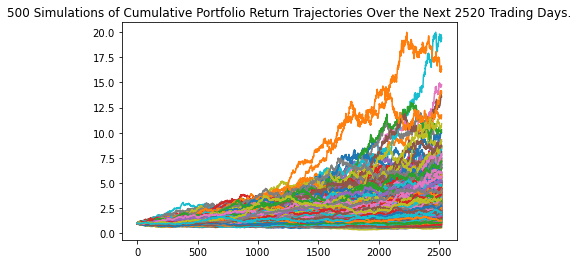

In [357]:
# Plot simulation outcomes
MC_10.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

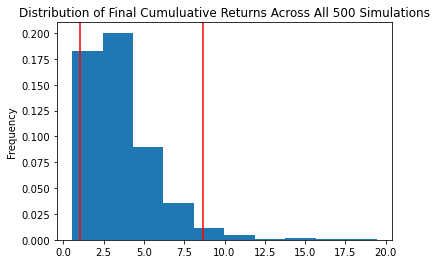

In [358]:
# Plot probability distribution and confidence intervals
MC_10.plot_distribution()

In [359]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_10 = MC_10.summarize_cumulative_return()

# Print summary statistics
summary_10

count           500.000000
mean              3.626505
std               2.244116
min               0.554036
25%               2.103432
50%               3.031887
75%               4.459692
max              19.426003
95% CI Lower      1.062652
95% CI Upper      8.660267
Name: 2520, dtype: float64

In [360]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_10['95% CI Lower']* initial_investment,2)
ci_upper_ten = round(summary_10['95% CI Upper']* initial_investment,2)

# Print results
print_ten = (f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio over the next 10 years will end within in the range of ${ci_lower_ten} and ${ci_upper_ten}")
print(print_ten)

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $53132.58 and $433013.36


In [361]:
print(f"Portfolio 1 {list(MC_30.portfolio_data.keys().get_level_values(0).unique())}: {MC_30.weights}")
print(print_thirty)
print(f"Portfolio 2 {list(MC_5.portfolio_data.keys().get_level_values(0).unique())}: {MC_5.weights}")
print(print_five)
print(f"Portfolio 3 {list(MC_10.portfolio_data.keys().get_level_values(0).unique())}: {MC_10.weights}")
print(print_ten)

Portfolio 1 ['AGG', 'SPY']: [0.4, 0.6]
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $53223.16 and $806588.13
Portfolio 2 ['AGG', 'SPY']: [0.7, 0.3]
There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $45638.72 and $80094.35
Portfolio 3 ['AGG', 'SPY']: [0.1, 0.9]
There is a 95% chance that an initial investment of $50000 in the portfolio over the next 10 years will end within in the range of $53132.58 and $433013.36
